# Predicting Concrete Compressive Strength - Comparison with Linear Models

In this code notebook, we will analyze the statistics pertaining the various models presented in this project. In the Exploratory Data Analysis notebook, we explored the various relationships that each consituent of concrete has on the cured compressive strength. The materials that held the strongest relationships, regardless of curing time, were cement, cementitious ratio, superplasticizer ratio, and fly ash ratio. We will examine each of the linear ratios independent of age, as well as at the industry-standard 28 day cure time mark.

## Dataset Citation

This dataset was retrieved from the UC Irvine Machine Learning Repository from the following URL: <https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength>. 

The dataset was donated to the UCI Repository by Prof. I-Cheng Yeh of Chung-Huah University, who retains copyright for the following published the following paper: I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998). Additional papers citing this dataset are listed at the reference link above.

## Import the Relevant Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Linear Regresssion Model
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

## Import & Check the Data

In [2]:
df1 = pd.read_csv('2020_1124_Modeling_Data.csv')
df2 = pd.read_csv('2020_1123_Concrete_Data_Loaded_Transformed.csv')

original_data = df1.copy()
transformed_data = df2.copy()

In [3]:
# The original data contains kg/m^3 values
original_data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Original data
original_data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# The transformed data contains ratios to total mass of the concrete mix
transformed_data.head()

,Cementitious_Ratio,Slag_Ratio,Fly_Ash_Ratio,Water_to_Cementitious_Ratio,Superplasticizer_Ratio,Coarse_Aggregate_Ratio,Sand_Ratio,Age,Compressive_Strength
0,0.205086,0.000000,0.0,0.400000,0.0,0.461444,0.251436,1,12.638095
1,0.167391,0.000000,0.0,0.483117,0.0,0.420000,0.331739,1,6.267337
2,0.058291,0.087436,0.0,1.375358,0.0,0.437179,0.336924,3,8.063422
3,0.145726,0.000000,0.0,0.550143,0.0,0.437179,0.336924,3,15.049193
4,0.085350,0.056900,0.0,0.966767,0.0,0.420474,0.354764,3,9.131420


In [6]:
# Transformed data
transformed_data.describe()

,Cementitious_Ratio,Slag_Ratio,Fly_Ash_Ratio,Water_to_Cementitious_Ratio,Superplasticizer_Ratio,Coarse_Aggregate_Ratio,Sand_Ratio,Age,Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.142726,0.031643,0.155263,0.611796,0.002620,0.415166,0.330117,45.662136,35.817836
std,0.040513,0.036961,0.187884,0.278319,0.002494,0.031021,0.033245,63.169912,16.705679
min,0.044815,0.000000,0.000000,0.265918,0.000000,0.345890,0.247971,1.000000,2.331808
25%,0.124002,0.000000,0.000000,0.447540,0.000000,0.392294,0.311208,7.000000,23.707115
50%,0.143272,0.009455,0.000000,0.547837,0.002727,0.420464,0.330543,28.000000,34.442774
75%,0.162794,0.061972,0.319960,0.666639,0.004338,0.437623,0.354096,56.000000,46.136287
max,0.259517,0.150339,0.588415,1.882353,0.013149,0.479846,0.414147,365.000000,82.599225


## Cement Modeling - Including All Cure Times

We understand that the ratio of cement to compressive strength is linear. We will model this relationship in Python and evaluate its performance compared to our ANN model.

### Visualization

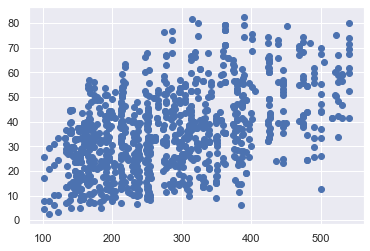

In [7]:
# We will visualize the linear relationship between quantity of cement and compressive strength
cement = original_data['Cement']
strength = original_data['Compressive_Strength']
plt.scatter(cement,strength)

### Train the Linear Model

In [8]:
# Reshape the data so it complies with the linear model requirements
X = np.array(cement).reshape(1030,1)
y = np.array(strength).reshape(1030,1)

In [9]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [10]:
y_pred = lm.predict(X_test)

### Linear Equation

In [11]:
# print the intercept
print(lm.intercept_)

[13.78517188]


In [12]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,0.077896


### Model Evaluation

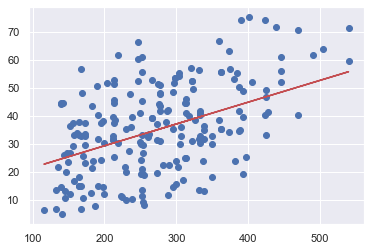

In [13]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [14]:
# Evaluation Metrics
MAE_cement = mean_absolute_error(y_test, y_pred)
MSE_cement = mean_squared_error(y_test, y_pred)
RMSE_cement = np.sqrt(mean_squared_error(y_test, y_pred))

cement_stats = [MAE_cement,MSE_cement,RMSE_cement] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR CEMENT VS. COMPRESSIVE STRENGTH")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_cement}\nMean Squared Error:\t\t\t{MSE_cement}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_cement}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR CEMENT VS. COMPRESSIVE STRENGTH
-----------------------------
Mean Absolute Error (MAE):		11.55561279863471
Mean Squared Error:			192.78479855432548
Root Mean Squared Error (RMSE):		13.884696559677689
-----------------------------




## Cement Modeling - 28 Day Cure Time

We will model the cement vs compressive strength relationship for a constant cure time (28 days).

### Visualization

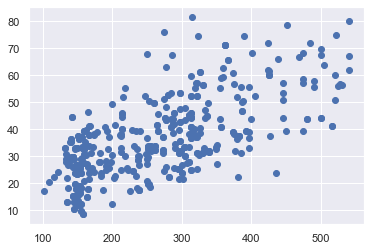

In [15]:
# We will visualize the linear relationship between quantity of cement and compressive strength at 28 days
cement = original_data[original_data['Age']==28]['Cement']
strength = original_data[original_data['Age']==28]['Compressive_Strength']
plt.scatter(cement,strength)

### Train the Linear Model

In [16]:
# Reshape the data so it complies with the linear model requirements
X = np.array(cement).reshape(425,1)
y = np.array(strength).reshape(425,1)

In [17]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [18]:
y_pred = lm.predict(X_test)

### Linear Equation

In [19]:
# print the intercept
print(lm.intercept_)

[13.07410297]


In [20]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,0.088248


### Model Evaluation

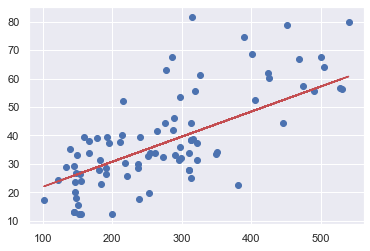

In [21]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [22]:
# Evaluation Metrics
MAE_cement_28 = mean_absolute_error(y_test, y_pred)
MSE_cement_28 = mean_squared_error(y_test, y_pred)
RMSE_cement_28 = np.sqrt(mean_squared_error(y_test, y_pred))

cement_28_stats = [MAE_cement_28,MSE_cement_28,RMSE_cement_28] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR CEMENT VS. COMPRESSIVE STRENGTH")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_cement_28}\nMean Squared Error:\t\t\t{MSE_cement_28}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_cement_28}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR CEMENT VS. COMPRESSIVE STRENGTH
-----------------------------
Mean Absolute Error (MAE):		9.134081632197555
Mean Squared Error:			140.11750347700305
Root Mean Squared Error (RMSE):		11.837123952928899
-----------------------------




## Cementitious Ratio Modeling - Including All Cure Times

We know that the ratio of cementitious materials to the total mass is (cement + fly ash)/(total mass) to compressive strength is linear. We will model this relationship in Python and evaluate its performance.

### Visualization

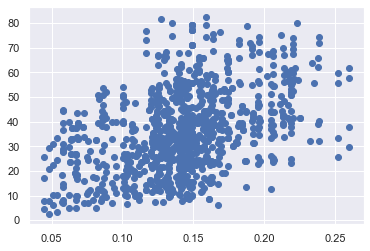

In [23]:
# We will visualize the linear relationship between quantity of cementitious materials and compressive strength
cementitious = transformed_data['Cementitious_Ratio']
strength = transformed_data['Compressive_Strength']
plt.scatter(cementitious,strength)

### Train the Linear Model

In [24]:
# Reshape the data so it complies with the linear model requirements
X = np.array(cementitious).reshape(1030,1)
y = np.array(strength).reshape(1030,1)

In [25]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [26]:
y_pred = lm.predict(X_test)

### Linear Equation

In [27]:
# print the intercept
print(lm.intercept_)

[10.00280955]


In [28]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,180.19044


### Model Evaluation

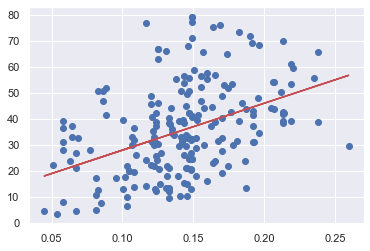

In [29]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [30]:
# Evaluation Metrics
MAE_cementitious = mean_absolute_error(y_test, y_pred)
MSE_cementitious = mean_squared_error(y_test, y_pred)
RMSE_cementitious = np.sqrt(mean_squared_error(y_test, y_pred))

cementitious_stats = [MAE_cementitious,MSE_cementitious,RMSE_cementitious] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR CEMENTITIOUS RATIO VS. COMPRESSIVE STRENGTH")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_cementitious}\nMean Squared Error:\t\t\t{MSE_cementitious}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_cementitious}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR CEMENTITIOUS RATIO VS. COMPRESSIVE STRENGTH
-----------------------------
Mean Absolute Error (MAE):		12.834672509172698
Mean Squared Error:			253.05814774985234
Root Mean Squared Error (RMSE):		15.907801474429217
-----------------------------




## Cementitious Ratio Modeling - 28 Day Cure Time

### Visualization

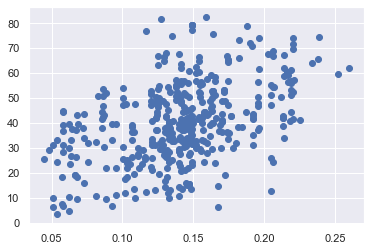

In [31]:
# We will visualize the linear relationship between quantity of cementitious materials and compressive strength at 28 days
cementitious = transformed_data[original_data['Age']==28]['Cementitious_Ratio']
strength = transformed_data[original_data['Age']==28]['Compressive_Strength']
plt.scatter(cementitious,strength)

### Train the Linear Model

In [32]:
# Reshape the data so it complies with the linear model requirements
X = np.array(cementitious).reshape(425,1)
y = np.array(strength).reshape(425,1)

In [33]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [34]:
y_pred = lm.predict(X_test)

### Linear Equation

In [35]:
# print the intercept
print(lm.intercept_)

[13.59333113]


In [36]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,191.571248


### Model Evaluation

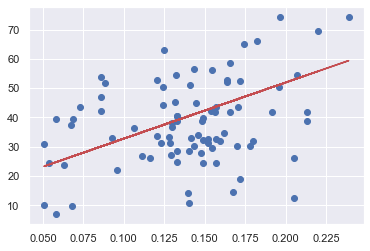

In [37]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [38]:
# Evaluation Metrics
MAE_cementitious_28 = mean_absolute_error(y_test, y_pred)
MSE_cementitious_28 = mean_squared_error(y_test, y_pred)
RMSE_cementitious_28 = np.sqrt(mean_squared_error(y_test, y_pred))

cementitious_28_stats = [MAE_cementitious_28,MSE_cementitious_28,RMSE_cementitious_28] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR CEMENTITIOUS RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_cementitious_28}\nMean Squared Error:\t\t\t{MSE_cementitious_28}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_cementitious_28}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR CEMENTITIOUS RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS
-----------------------------
Mean Absolute Error (MAE):		11.519580245958837
Mean Squared Error:			197.95720060481753
Root Mean Squared Error (RMSE):		14.069726386991949
-----------------------------




## Fly Ash Ratio Modeling - Including All Cure Times

The fly ash ratio is interpreted as the percentage of fly ash within the cementitious materials mix, that is, Fly_Ash_Ratio = (fly ash + cement)/(total mass).

### Visualization

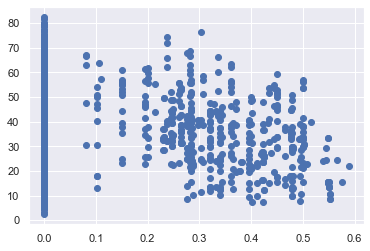

In [39]:
# We will visualize the linear relationship between fly ash ratio and compressive strength
fly = transformed_data['Fly_Ash_Ratio']
strength = transformed_data['Compressive_Strength']
plt.scatter(fly,strength)

### Data Preprocessing

We see from the graph above that there are many instances where there is no fly ash in the mix design. Let us use only nonzero entries for our analysis.

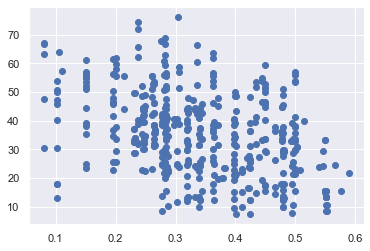

In [40]:
fly = transformed_data[transformed_data['Fly_Ash_Ratio']!=0]['Fly_Ash_Ratio']
strength = transformed_data[transformed_data['Fly_Ash_Ratio']!=0]['Compressive_Strength']
plt.scatter(fly,strength)

### Train the Linear Model

In [41]:
# Reshape the data so it complies with the linear model requirements
X = np.array(fly).reshape(464,1)
y = np.array(strength).reshape(464,1)

In [42]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [43]:
y_pred = lm.predict(X_test)

### Linear Equation

In [44]:
# print the intercept
print(lm.intercept_)

[53.13047155]


In [45]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-54.508785


### Model Evaluation

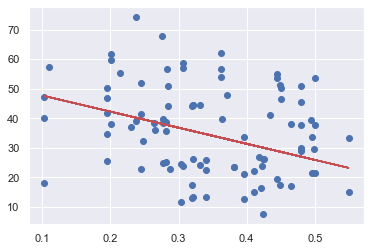

In [46]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [47]:
# Evaluation Metrics
MAE_fly = mean_absolute_error(y_test, y_pred)
MSE_fly = mean_squared_error(y_test, y_pred)
RMSE_fly = np.sqrt(mean_squared_error(y_test, y_pred))

fly_stats = [MAE_fly,MSE_fly,RMSE_fly] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR FLY ASH RATIO VS. COMPRESSIVE STRENGTH")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_fly}\nMean Squared Error:\t\t\t{MSE_fly}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_fly}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR FLY ASH RATIO VS. COMPRESSIVE STRENGTH
-----------------------------
Mean Absolute Error (MAE):		12.121987321537818
Mean Squared Error:			212.8943249027957
Root Mean Squared Error (RMSE):		14.590898700998363
-----------------------------




## Fly Ash Ratio Modeling - 28 Day Cure Time

The fly ash ratio is interpreted as the percentage of fly ash within the cementitious materials mix, that is, Fly_Ash_Ratio = (fly ash + cement)/(total mass).

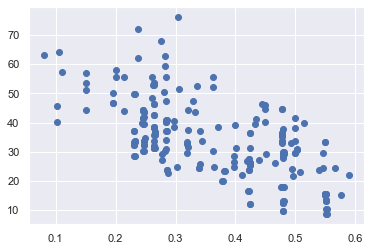

In [48]:
fly = transformed_data[((transformed_data['Fly_Ash_Ratio']!=0)&(transformed_data['Age']==28))]['Fly_Ash_Ratio']
strength = transformed_data[((transformed_data['Fly_Ash_Ratio']!=0)&(transformed_data['Age']==28))]['Compressive_Strength']
plt.scatter(fly,strength)

### Train the Linear Model

In [49]:
# Reshape the data so it complies with the linear model requirements
X = np.array(fly).reshape(217,1)
y = np.array(strength).reshape(217,1)

In [50]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [51]:
y_pred = lm.predict(X_test)

### Linear Equation

In [52]:
# print the intercept
print(lm.intercept_)

[60.04189914]


In [53]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-71.730364


### Model Evaluation

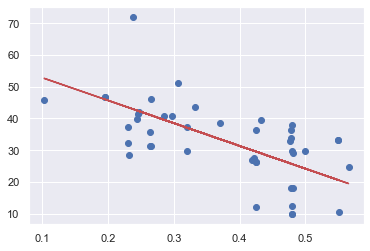

In [54]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [55]:
# Evaluation Metrics
MAE_fly_28 = mean_absolute_error(y_test, y_pred)
MSE_fly_28 = mean_squared_error(y_test, y_pred)
RMSE_fly_28 = np.sqrt(mean_squared_error(y_test, y_pred))

fly_28_stats = [MAE_fly_28,MSE_fly_28,RMSE_fly_28] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR FLY ASH RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_fly_28}\nMean Squared Error:\t\t\t{MSE_fly_28}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_fly_28}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR FLY ASH RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS
-----------------------------
Mean Absolute Error (MAE):		7.692694771235926
Mean Squared Error:			91.3179595195656
Root Mean Squared Error (RMSE):		9.556043089038768
-----------------------------




## Superplasticizer Ratio Modeling - Including All Cure Times

The superplasticizer ratio is the ratio of superplasticizer contained within the total mix design, by weight.

### Visualization

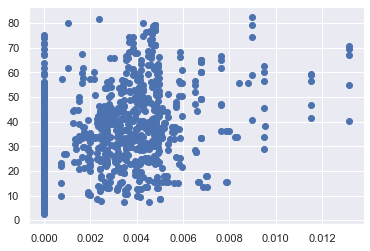

In [56]:
# We will visualize the linear relationship between superplasticizer ratio and compressive strength
superplasticizer = transformed_data['Superplasticizer_Ratio']
strength = transformed_data['Compressive_Strength']
plt.scatter(superplasticizer,strength)

### Data Preprocessing

Once agaain, we see from the graph above that there are many instances where there is no superplasticizer in the mix design. Let us use only nonzero entries for our analysis.

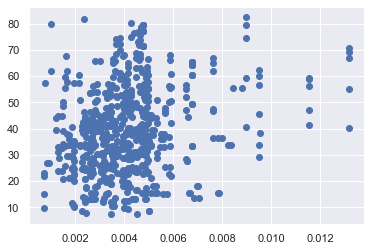

In [57]:
superplasticizer = transformed_data[transformed_data['Superplasticizer_Ratio']!=0]['Superplasticizer_Ratio']
strength = transformed_data[transformed_data['Superplasticizer_Ratio']!=0]['Compressive_Strength']
plt.scatter(superplasticizer,strength)

This is better, but we see a large spread in the data. Let's remove any outliers first, before training our model.

In [58]:
superplasticizer.describe()

count    651.000000
mean       0.004146
std        0.001875
min        0.000746
25%        0.002947
50%        0.003998
75%        0.004834
max        0.013149
Name: Superplasticizer_Ratio, dtype: float64

In [59]:
mean = 0.004146
three_sigma = 3*0.001875
upper = mean + three_sigma
lower = mean - three_sigma

print(f"The lower bound is:\t{lower}\nThe upper bound is:\t{upper}")

The lower bound is:	-0.0014789999999999994
The upper bound is:	0.009771


Since there are no negative ratios, we only need to remove data points where the superplasticizer ratio is greater than 0.009771.

<ipython-input-60-1ad850f1b580>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  superplasticizer = transformed_data[transformed_data['Superplasticizer_Ratio']!=0][transformed_data['Superplasticizer_Ratio'] < upper]['Superplasticizer_Ratio']
<ipython-input-60-1ad850f1b580>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  strength = transformed_data[transformed_data['Superplasticizer_Ratio']!=0][transformed_data['Superplasticizer_Ratio'] < upper]['Compressive_Strength']


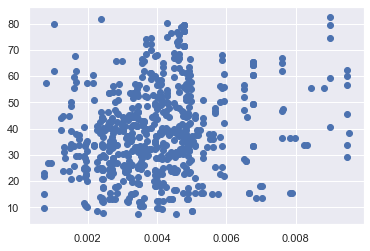

In [60]:
superplasticizer = transformed_data[transformed_data['Superplasticizer_Ratio']!=0][transformed_data['Superplasticizer_Ratio'] < upper]['Superplasticizer_Ratio']
strength = transformed_data[transformed_data['Superplasticizer_Ratio']!=0][transformed_data['Superplasticizer_Ratio'] < upper]['Compressive_Strength']
plt.scatter(superplasticizer,strength)

### Train the Linear Model

In [61]:
# We will train and test our model only on the data above, that does not contain outliers
# Reshape the data so it complies with the linear model requirements
X = np.array(superplasticizer).reshape(641,1)
y = np.array(strength).reshape(641,1)

In [62]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [63]:
y_pred = lm.predict(X_test)

### Linear Equation

In [64]:
# print the intercept
print(lm.intercept_)

[30.85660295]


In [65]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,2121.483927


### Model Evaluation

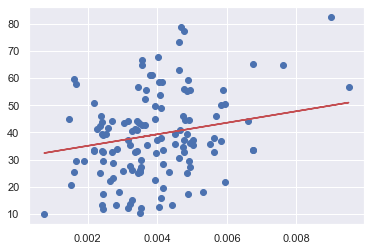

In [66]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [67]:
# Evaluation Metrics
MAE_super = mean_absolute_error(y_test, y_pred)
MSE_super = mean_squared_error(y_test, y_pred)
RMSE_super = np.sqrt(mean_squared_error(y_test, y_pred))

super_stats = [MAE_super,MSE_super,RMSE_super] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR SUPERPLASTICIZER RATIO VS. COMPRESSIVE STRENGTH")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_super}\nMean Squared Error:\t\t\t{MSE_super}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_super}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR SUPERPLASTICIZER RATIO VS. COMPRESSIVE STRENGTH
-----------------------------
Mean Absolute Error (MAE):		12.189766983759341
Mean Squared Error:			225.90929843844432
Root Mean Squared Error (RMSE):		15.030279386573103
-----------------------------




## Superplasticizer Ratio Modeling - 28 Day Cure Time

The superplasticizer ratio is the ratio of superplasticizer contained within the total mix design, by weight.

### Visualization

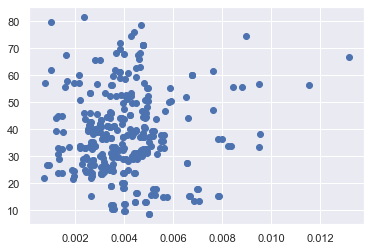

In [68]:
superplasticizer = transformed_data[((transformed_data['Superplasticizer_Ratio']!=0)&(transformed_data['Age']==28))]['Superplasticizer_Ratio']
strength = transformed_data[((transformed_data['Superplasticizer_Ratio']!=0)&(transformed_data['Age']==28))]['Compressive_Strength']
plt.scatter(superplasticizer,strength)

This is better, but we see a large spread in the data. Let's remove any outliers first, before training our model.

In [69]:
superplasticizer.describe()

count    317.000000
mean       0.004031
std        0.001713
min        0.000746
25%        0.002988
50%        0.003910
75%        0.004776
max        0.013149
Name: Superplasticizer_Ratio, dtype: float64

In [70]:
mean = 0.004146
three_sigma = 3*0.001875
upper = mean + three_sigma
lower = mean - three_sigma

print(f"The lower bound is:\t{lower}\nThe upper bound is:\t{upper}")

The lower bound is:	-0.0014789999999999994
The upper bound is:	0.009771


Since there are no negative ratios, we only need to remove data points where the superplasticizer ratio is greater than 0.009771.

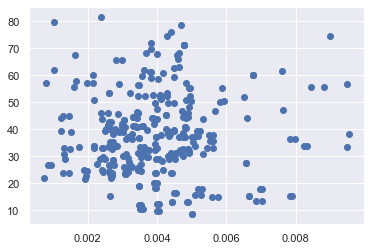

In [71]:
superplasticizer = transformed_data[((transformed_data['Superplasticizer_Ratio']!=0)&(transformed_data['Age']==28)&(transformed_data['Superplasticizer_Ratio']<upper))]['Superplasticizer_Ratio']
strength = transformed_data[((transformed_data['Superplasticizer_Ratio']!=0)&(transformed_data['Age']==28)&(transformed_data['Superplasticizer_Ratio']<upper))]['Compressive_Strength']
plt.scatter(superplasticizer,strength)

### Train the Linear Model

In [72]:
# We will train and test our model only on the data above, that does not contain outliers
# Reshape the data so it complies with the linear model requirements
X = np.array(superplasticizer).reshape(315,1)
y = np.array(strength).reshape(315,1)

In [73]:
# Perform a train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the linear model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Test the Linear Model

In [74]:
y_pred = lm.predict(X_test)

### Linear Equation

In [75]:
# print the intercept
print(lm.intercept_)

[36.83431501]


In [76]:
coeff = pd.DataFrame(lm.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,273.960172


### Model Evaluation

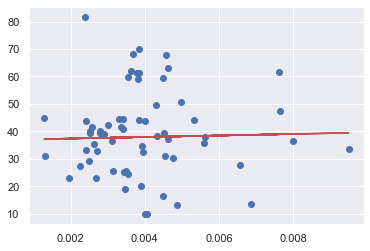

In [77]:
# Plot the linear model preditions as a line superimposed on a scatter plot of the testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

In [78]:
# Evaluation Metrics
MAE_super_28 = mean_absolute_error(y_test, y_pred)
MSE_super_28 = mean_squared_error(y_test, y_pred)
RMSE_super_28 = np.sqrt(mean_squared_error(y_test, y_pred))

super_stats_28 = [MAE_super_28,MSE_super_28,RMSE_super_28] # storing for model comparison at the end of this notebook

# Print the metrics
print(f"EVALUATION METRICS, LINEAR MODEL FOR SUPERPLASTICIZER RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_super_28}\nMean Squared Error:\t\t\t{MSE_super_28}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_super_28}")
print('-----------------------------\n\n')

EVALUATION METRICS, LINEAR MODEL FOR SUPERPLASTICIZER RATIO VS. COMPRESSIVE STRENGTH AT 28 DAYS
-----------------------------
Mean Absolute Error (MAE):		11.954354128234902
Mean Squared Error:			243.9703785891613
Root Mean Squared Error (RMSE):		15.619551164779393
-----------------------------




## Model Comparisons Analysis

Neither superplasticizer linear model appeared to represent the data well from a visual perspective. The cement, cementitious ratio, and fly ash ratio linear models, however, did. We can display all of the evaluation metrics below and compare them to the artificial neural network's (ANN) performance.

In [103]:
ANN_metrics = [5.083552,6.466492**2,6.466492]

metrics = [cement_stats, cementitious_stats, fly_stats, super_stats, ANN_metrics]
metrics_28 = [cement_28_stats, cementitious_28_stats, fly_28_stats, super_stats_28, ANN_metrics]

metrics_df = pd.DataFrame(data=metrics, index=['Cement (Ignoring Cure Time)','Cementitious_Ratio (Ignoring Cure Time)','Fly_Ash_Ratio (Ignoring Cure Time)','Superplasticizer_Ratio (Ignoring Cure Time)','ANN (Function of Time)'], columns=['MAE','MSE','RMSE'])
metrics_28_df = pd.DataFrame(data=metrics_28, index=['Cement (Cure Time = 28 Days)','Cementitious_Ratio (Cure Time = 28 Days)','Fly_Ash_Ratio (Cure Time = 28 Days)','Superplasticizer_Ratio (Cure Time = 28 Days)','ANN (Function of Time)'], columns=['MAE','MSE','RMSE'])

In [104]:
metrics_df

,MAE,MSE,RMSE
Cement (Ignoring Cure Time),11.555613,192.784799,13.884697
Cementitious_Ratio (Ignoring Cure Time),12.834673,253.058148,15.907801
Fly_Ash_Ratio (Ignoring Cure Time),12.121987,212.894325,14.590899
Superplasticizer_Ratio (Ignoring Cure Time),12.189767,225.909298,15.030279
ANN (Function of Time),5.083552,41.815519,6.466492


In [105]:
metrics_28_df

,MAE,MSE,RMSE
Cement (Cure Time = 28 Days),9.134082,140.117503,11.837124
Cementitious_Ratio (Cure Time = 28 Days),11.519580,197.957201,14.069726
Fly_Ash_Ratio (Cure Time = 28 Days),7.692695,91.317960,9.556043
Superplasticizer_Ratio (Cure Time = 28 Days),11.954354,243.970379,15.619551
ANN (Function of Time),5.083552,41.815519,6.466492


## Conclusions & Recommendations

By comparing the evaluation metrics for all models, we conclude that the ANN model performed significantly better than all of the linear models. It outperformed the best linear model's RMSE (for Fly_Ash_Ratio at 28 Days) by over 30%! An important note is that the linear models were not scaled, and the ANN model was. We kept the linear models biased in order to maintain coefficient interpretabililty, whereas that was not relevant to the ANN model.

What is surprising is that the ANN model still outperformed the linear models, even when controlling for cure time at 28 days. Perhaps the most startling insight is that the fly ash ratio was even more accurate at predicting concrete compressive strength than the cement quantity, to the point that it had the lowest errors of all of the linear models. We therefore recommend that engineers give very conservative fly ash ratio specifications when allowing substitutions for Portland cement.